***Kvasir-SEG***

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Define paths to images and masks
image_dir = "/content/drive/MyDrive/kvasir-seg/Kvasir-SEG/images"  # Update with the actual path
mask_dir = "/content/drive/MyDrive/kvasir-seg/Kvasir-SEG/masks"   # Update with the actual path

Total Images: 1000
Total Masks: 1000
Image Dimensions: (529, 622, 3)
Mask Dimensions: (529, 622, 3)


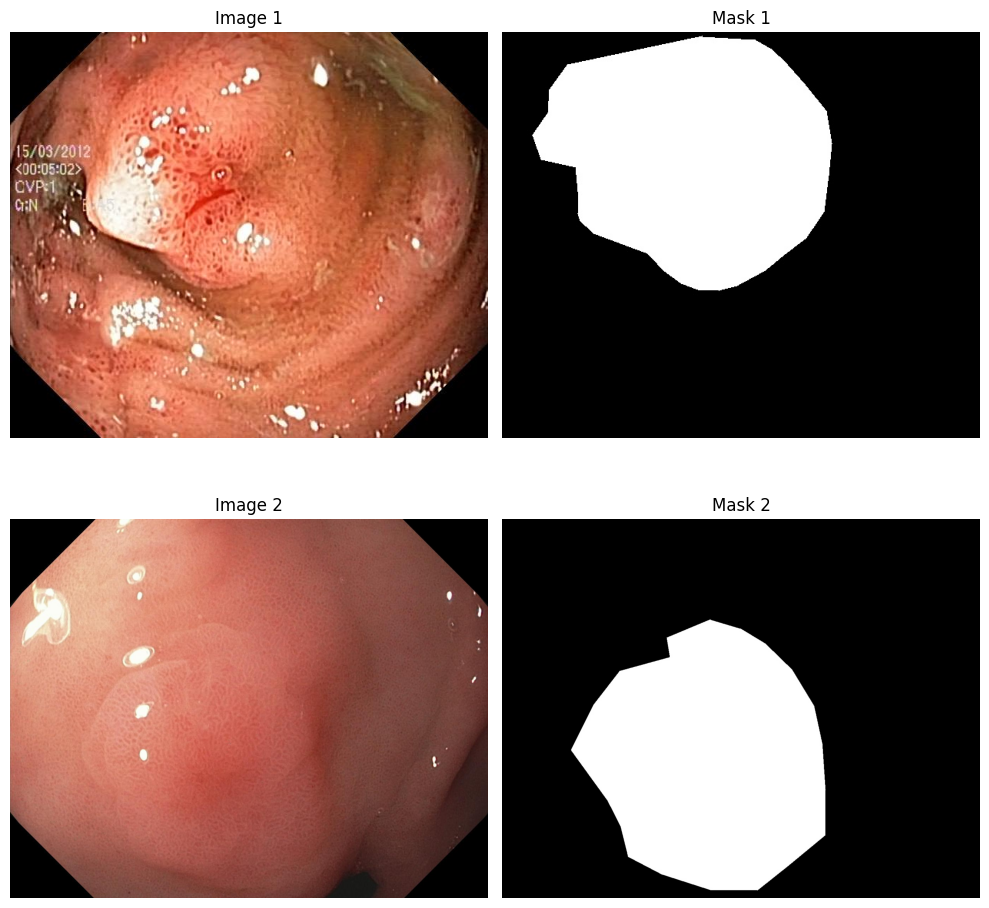

Unique Image Sizes: {(522, 621), (449, 469), (530, 561), (530, 570), (503, 616), (458, 474), (530, 588), (527, 564), (531, 571), (531, 580), (529, 619), (528, 510), (528, 528), (474, 557), (547, 627), (529, 502), (475, 620), (530, 556), (530, 565), (530, 574), (530, 583), (1010, 1220), (531, 548), (531, 557), (528, 622), (531, 566), (529, 605), (529, 614), (529, 623), (547, 622), (546, 568), (531, 525), (530, 569), (424, 560), (530, 578), (528, 608), (531, 552), (528, 617), (529, 591), (1012, 1224), (529, 600), (510, 605), (529, 618), (530, 443), (530, 537), (547, 617), (530, 546), (547, 626), (530, 564), (531, 529), (528, 603), (528, 612), (528, 621), (529, 613), (487, 332), (530, 541), (494, 618), (547, 621), (530, 559), (528, 598), (528, 607), (529, 572), (520, 603), (528, 616), (529, 581), (529, 590), (520, 621), (529, 608), (529, 437), (495, 569), (530, 536), (547, 616), (547, 625), (530, 554), (528, 602), (528, 611), (529, 594), (531, 613), (531, 622), (523, 370), (530, 504), (50

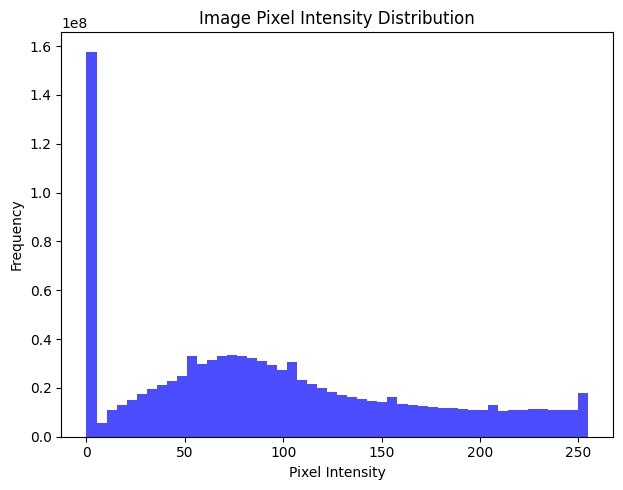

Average Mask Coverage: 15.78%
Median Mask Coverage: 11.76%


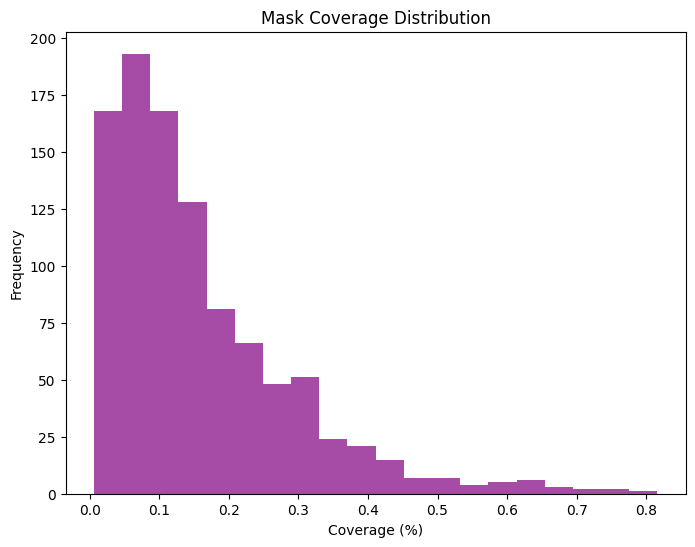

In [3]:
# Helper function to load images
def load_images_from_directory(directory):
    images = []
    filenames = sorted(os.listdir(directory))  # Sort to match images and masks
    for filename in filenames:
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(directory, filename)
            image = np.array(Image.open(filepath))
            images.append(image)
    return images, filenames

# Load dataset
images, image_filenames = load_images_from_directory(image_dir)
masks, mask_filenames = load_images_from_directory(mask_dir)

# Basic EDA
print(f"Total Images: {len(images)}")
print(f"Total Masks: {len(masks)}")
print(f"Image Dimensions: {images[0].shape}")
print(f"Mask Dimensions: {masks[0].shape}")

# Display a few image-mask pairs
def display_image_mask_pairs(images, masks, num_samples=2):
    plt.figure(figsize=(10, 5 * num_samples))
    for i in range(num_samples):
        plt.subplot(num_samples, 2, i * 2 + 1)
        plt.imshow(images[i])
        plt.title(f"Image {i + 1}")
        plt.axis("off")

        plt.subplot(num_samples, 2, i * 2 + 2)
        plt.imshow(masks[i], cmap='gray')
        plt.title(f"Mask {i + 1}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

display_image_mask_pairs(images, masks)

# Check image and mask statistics
def dataset_statistics(images, masks):
    image_sizes = [img.shape[:2] for img in images]
    unique_sizes = set(image_sizes)
    print(f"Unique Image Sizes: {unique_sizes}")

    mask_sizes = [mask.shape[:2] for mask in masks]
    unique_mask_sizes = set(mask_sizes)
    print(f"Unique Mask Sizes: {unique_mask_sizes}")

    # Pixel intensity statistics
    image_pixel_values = np.concatenate([img.ravel() for img in images])
    mask_pixel_values = np.concatenate([mask.ravel() for mask in masks])

    print(f"Image Pixel Intensity Range: {image_pixel_values.min()} to {image_pixel_values.max()}")
    print(f"Mask Pixel Intensity Range: {mask_pixel_values.min()} to {mask_pixel_values.max()}")

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(image_pixel_values, bins=50, color='blue', alpha=0.7)
    plt.title("Image Pixel Intensity Distribution")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

dataset_statistics(images, masks)

# Check mask overlap percentage
def calculate_mask_coverage(masks):
    coverages = []
    for mask in masks:
        coverage = np.sum(mask > 0) / mask.size
        coverages.append(coverage)
    return coverages

mask_coverages = calculate_mask_coverage(masks)
print(f"Average Mask Coverage: {np.mean(mask_coverages):.2%}")
print(f"Median Mask Coverage: {np.median(mask_coverages):.2%}")

# Plot mask coverage
plt.figure(figsize=(8, 6))
plt.hist(mask_coverages, bins=20, color='purple', alpha=0.7)
plt.title("Mask Coverage Distribution")
plt.xlabel("Coverage (%)")
plt.ylabel("Frequency")
plt.show()




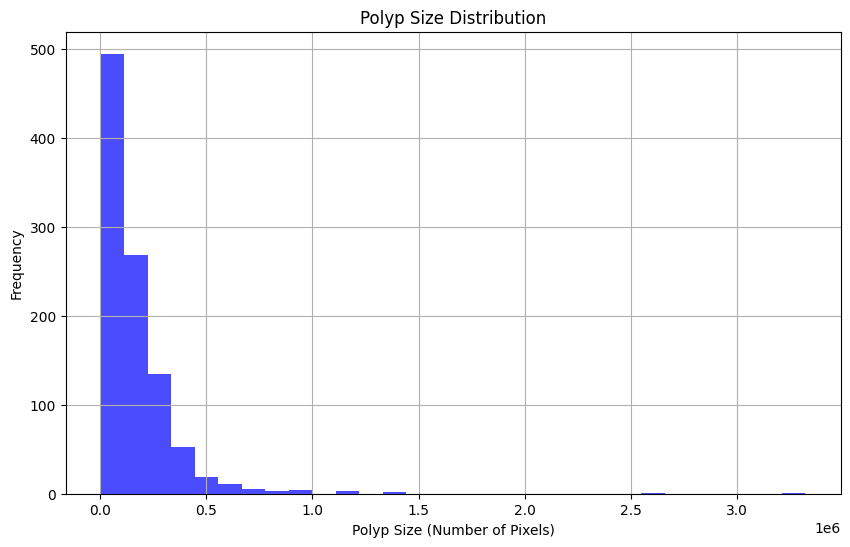

Total Masks: 1000
Average Polyp Size: 169141.80 pixels
Median Polyp Size: 117699.00 pixels
Minimum Polyp Size: 3588 pixels
Maximum Polyp Size: 3321477 pixels


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load mask files
def load_masks_from_directory(directory):
    masks = []
    filenames = sorted(os.listdir(directory))
    for filename in filenames:
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(directory, filename)
            mask = np.array(Image.open(filepath))
            masks.append(mask)
    return masks

# Load all masks
masks = load_masks_from_directory(mask_dir)

# Function to calculate polyp sizes
def calculate_polyp_sizes(masks):
    polyp_sizes = []
    for mask in masks:
        polyp_size = np.sum(mask > 0)  # Count non-zero pixels
        polyp_sizes.append(polyp_size)
    return polyp_sizes

# Calculate polyp sizes
polyp_sizes = calculate_polyp_sizes(masks)

# Plot polyp size distribution
def plot_polyp_size_distribution(polyp_sizes):
    plt.figure(figsize=(10, 6))
    plt.hist(polyp_sizes, bins=30, color="blue", alpha=0.7)
    plt.title("Polyp Size Distribution")
    plt.xlabel("Polyp Size (Number of Pixels)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

plot_polyp_size_distribution(polyp_sizes)

# Print some basic statistics
print(f"Total Masks: {len(masks)}")
print(f"Average Polyp Size: {np.mean(polyp_sizes):.2f} pixels")
print(f"Median Polyp Size: {np.median(polyp_sizes):.2f} pixels")
print(f"Minimum Polyp Size: {np.min(polyp_sizes)} pixels")
print(f"Maximum Polyp Size: {np.max(polyp_sizes)} pixels")

